In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.getcwd()
os.chdir('/content/gdrive/My Drive/ChestXRay')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch

import os
import random
import logging
import time
from datetime import datetime

from utils.setup_logging import setup_logging
from utils.unzip_data import unzip_data
from utils.dataloaders import get_dataset

from models.models import get_model

In [4]:
trainset = get_dataset('cleantrain')
testset = get_dataset('cleantest')

base_path = '/content/gdrive/My Drive/ChestXRay'
autoencoder = get_model(model='resnet18', kind='autoencoder', rep_dim=4900)
ae_load_path = os.path.join(base_path, 'models/saved_models/') + 'ae: resnet18 490-dim Aug-13 13:02.pt'
autoencoder.load_state_dict(torch.load(ae_load_path), strict=False)

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

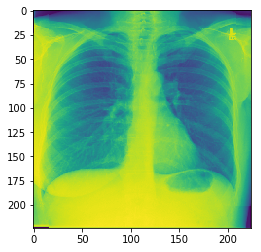

In [10]:
plt.imshow(np.array(trainset[10][0][0]))

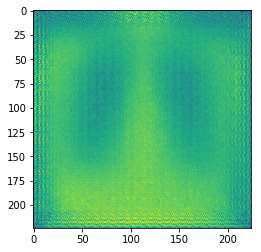

In [17]:
ae = autoencoder
ae.eval()
op = ae(trainset[10][0].unsqueeze(0))
plt.imshow(op[0][0].cpu().detach().numpy())